In [3]:
#importando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn as sk

#REPONDENDO A QUESTÃO 1
##Lendo o DataSet para avaliar os dados, observando o número de linhas, e o número de variáveis que serão parte da nossa análise.


In [4]:
# Importanto e lendo dataset com dados csv com pacote pandas
st_performance = pd.read_csv('./content/StudentsPerformance.csv', sep=',', encoding='iso-8859-1')

In [5]:
# Verificando os dados importados
st_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Obtendo o número de linhas (amostras) e colunas (atributos) do dataset
num_linhas, num_colunas = st_performance.shape

# Imprimindo o número de linhas e colunas
print(f'O dataset possui {num_linhas} linhas e {num_colunas} colunas.')

O dataset possui 1000 linhas e 8 colunas.


##Verificando valores nulos

In [7]:
#verificando se há valores nulos
st_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##Transfomando as variáveis qualitativas em quantitativas


In [8]:
#importanto a biblioteca para criar codificações
from sklearn.preprocessing import LabelEncoder

#transformando as variáveis qualitativas em quantitativas para os futuros calcuculos
st_performance_encoder = st_performance.copy()

codificador = LabelEncoder()
st_performance_encoder['gender'] = codificador.fit_transform(st_performance_encoder['gender'])
st_performance_encoder['race/ethnicity'] = codificador.fit_transform(st_performance_encoder['race/ethnicity'])
st_performance_encoder['parental level of education'] = codificador.fit_transform(st_performance_encoder['parental level of education'])
st_performance_encoder['lunch'] = codificador.fit_transform(st_performance_encoder['lunch'])
st_performance_encoder['test preparation course'] = codificador.fit_transform(st_performance_encoder['test preparation course'])

display(st_performance_encoder.info())
st_performance_encoder.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


None

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [9]:
#análise das notas por componente

st_performance_encoder.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.482,0.499926,0.0,0.00,0.0,1.0,1.0
race/ethnicity,1000.0,2.174,1.157179,0.0,1.00,2.0,3.0,4.0
parental level of education,1000.0,2.486,1.829522,0.0,1.00,2.0,4.0,5.0
lunch,1000.0,0.645,0.478753,0.0,0.00,1.0,1.0,1.0
test preparation course,1000.0,0.642,0.479652,0.0,0.00,1.0,1.0,1.0
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [10]:
st_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Questão 5

<b>Analise as notas de matemática dos alunos de forma mais completa possível.</b>


/tmp/ipykernel_5119/3176899071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(st_performance_encoder['math score'])


<Axes: title={'center': 'Distribuição de Frequências - Notas de matemática'}, xlabel='Pontuação', ylabel='Density'>

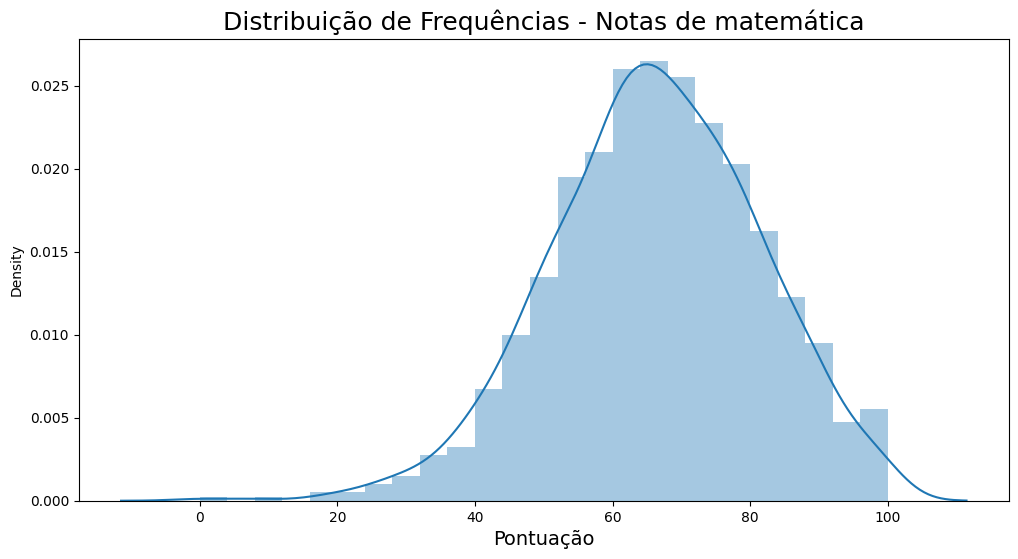

In [11]:
# Representação gráfica da distribuição de frequências para as notas de matemática
ax = sns.distplot(st_performance_encoder['math score'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Notas de matemática', fontsize=18)
ax.set_xlabel('Pontuação', fontsize=14)
ax

In [12]:
# Calculando a moda
Moda = st_performance_encoder['math score'].mode()[0]
Moda

65

In [13]:
# Calculando a mediana
Mediana = st_performance_encoder['math score'].median()
Mediana

66.0

In [14]:
# Calculando a média
Media = st_performance_encoder['math score'].mean()
Media

66.089

Ao analisar o gráfico de distribuição de frequência das notas de matemática, notamos que há uma simetria o que podemos facilmente comprovar matematicamente ao observar a relação entre média, mediana e moda.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='40%'>

In [28]:
Moda =~ Mediana =~ Media

False

In [16]:
# Obtendo os quartis
st_performance_encoder['math score'].quantile([0.25, 0.5, 0.75])

0.25    57.0
0.50    66.0
0.75    77.0
Name: math score, dtype: float64

<Axes: title={'center': 'Notas de matemática'}, xlabel='Pontuação'>

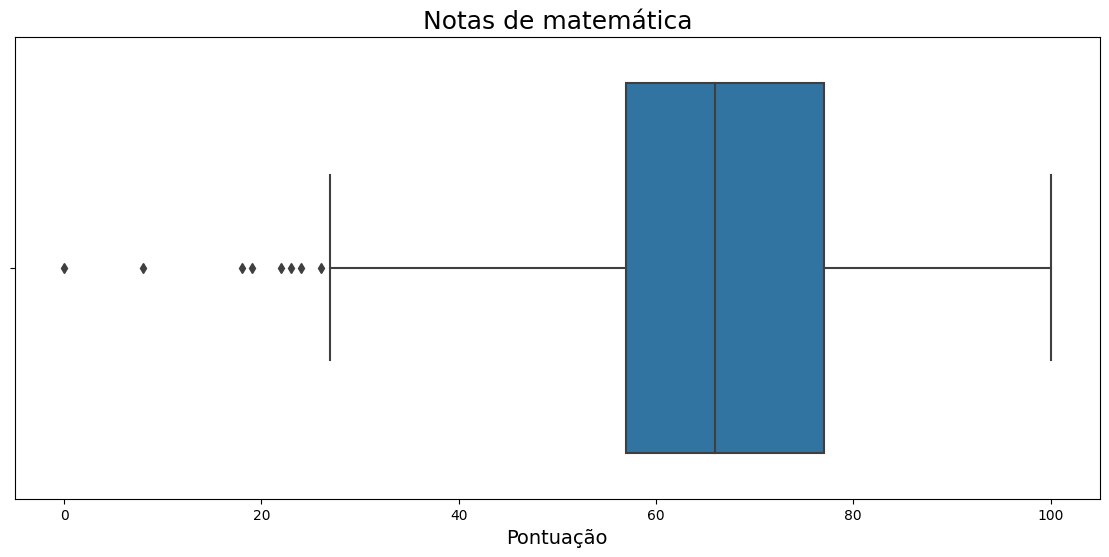

In [17]:
# Gerando o boxplot das notas de matemática
ax = sns.boxplot(x='math score', data=st_performance_encoder, orient='h')
ax.figure.set_size_inches(14, 6)
ax.set_title("Notas de matemática", fontsize=18)
ax.set_xlabel("Pontuação", fontsize=14)
ax

In [18]:
# Obtendo o desvio médio absoluto
(st_performance_encoder['math score'] - st_performance_encoder['math score'].mean()).abs().sum() / len(st_performance_encoder)

12.020245999999998

In [19]:
# Obtendo a variância das notas de matemática
st_performance_encoder['math score'].var()

229.91899799799796

In [20]:
# Obtendo o desvião padrão das notas de matemática
st_performance_encoder['math score'].std()

15.16308009600945


Especificando os limites de cada classe:

<b>A</b> ►  90-100

<b>B</b> ►  80-89

<b>C</b> ► 70-79

<b>D</b> ► 60-69

<b>F</b> ►  0-59

In [29]:
classes = [0, 59, 69, 79, 89, 100]
labels = ['F', 'D', 'C', 'B', 'A']

frequencia_absoluta = pd.value_counts(
  pd.cut(x = st_performance_encoder['math score'],
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia_relativa = pd.value_counts(
  pd.cut(x = st_performance_encoder['math score'],
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
)

dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência Absoluta': frequencia_absoluta, 'Frequência Relativa': frequencia_relativa}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = False, inplace=True)

<Axes: xlabel='math score'>

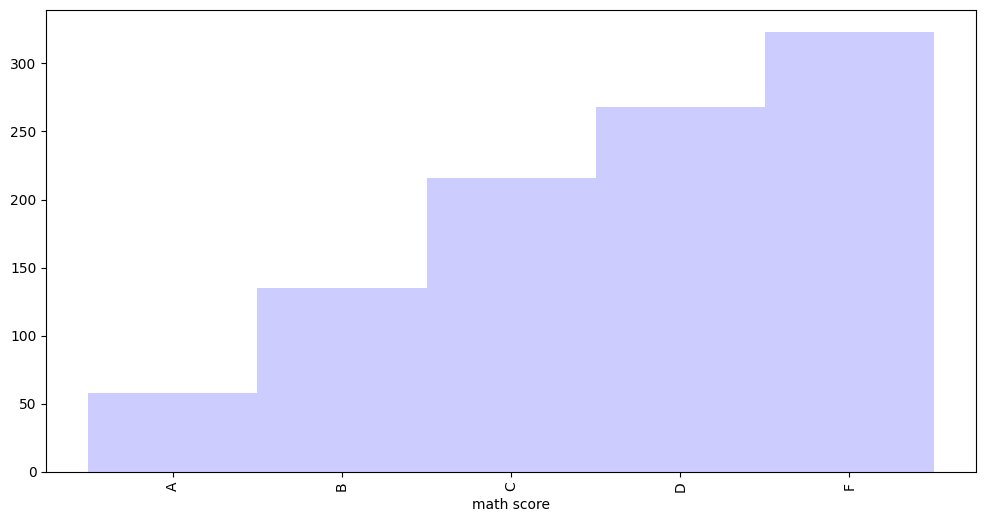

In [30]:
dist_freq_quantitativas_personalizadas['Frequência Absoluta'].plot.bar(width= 1, color = 'blue', alpha = 0.2, figsize=(12, 6))

### Conclusão

* O gráfico de distribuição de frequência das notas de matemática tem tendência a ser simétrica,
o que pode ser comprovado através da relação entre moda, mediana e média.
* 50% dos alunos obtiveram pontuação inferior a 66 (Classe D) e 75%, a 77 (Classe C)
* Notas entre 51 e 81 estão dentro do esperado, esses valores foram obtidos utilizando a média +/- o desvião padrão


<b>Qual a nota média de matemática dos alunos segundo o grau de
escolaridade dos pais?</b>

In [23]:
tabela_notas_media_matematica_por_escolaridade = st_performance.groupby(['parental level of education'])['math score'].mean()
tabela_notas_media_matematica_por_escolaridade

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [31]:
tabela_notas_matematica_por_escolaridade = st_performance.groupby(['parental level of education']).agg({'math score': ['mean', 'median', 'max', 'min', 'std']})
tabela_notas_matematica_por_escolaridade

math score                           
                                  mean median  max min        std
parental level of education                                      
associate's degree           67.882883   67.0  100  26  15.112093
bachelor's degree            69.389831   68.0  100  29  14.943789
high school                  62.137755   63.0   99   8  14.539651
master's degree              69.745763   73.0   95  40  15.153915
some college                 67.128319   67.5  100  19  14.312897
some high school             63.497207   65.0   97   0  15.927989

# Atividade Extra

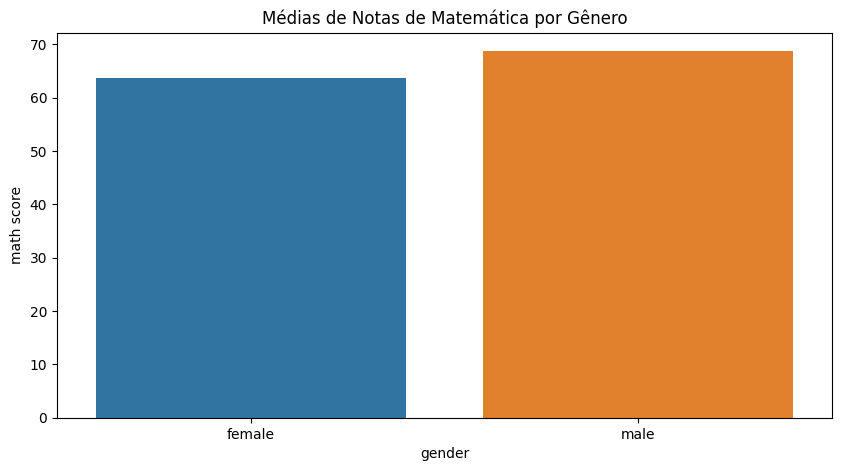

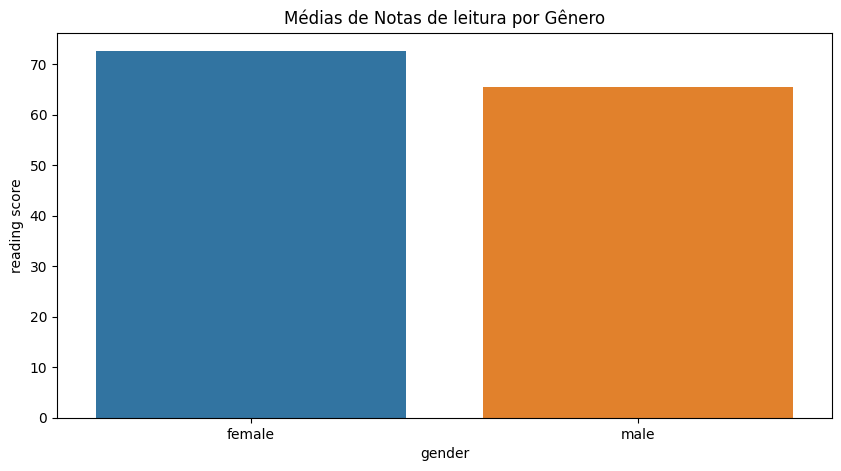

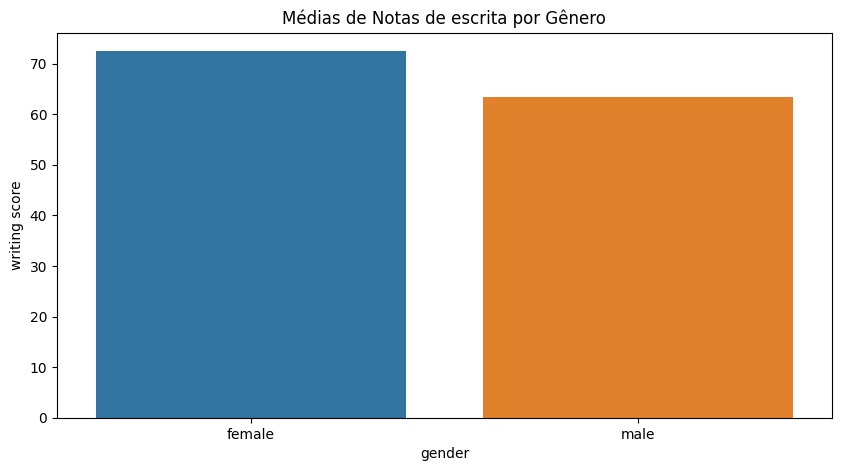

In [ ]:
# Médias de Notas por Gênero:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='gender', y='math score', data=st_performance, errorbar=None)
plt.title('Médias de Notas de Matemática por Gênero')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='gender', y='reading score', data=st_performance, errorbar=None)
plt.title('Médias de Notas de leitura por Gênero')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='gender', y='writing score', data=st_performance, errorbar=None)
plt.title('Médias de Notas de escrita por Gênero')
plt.show()

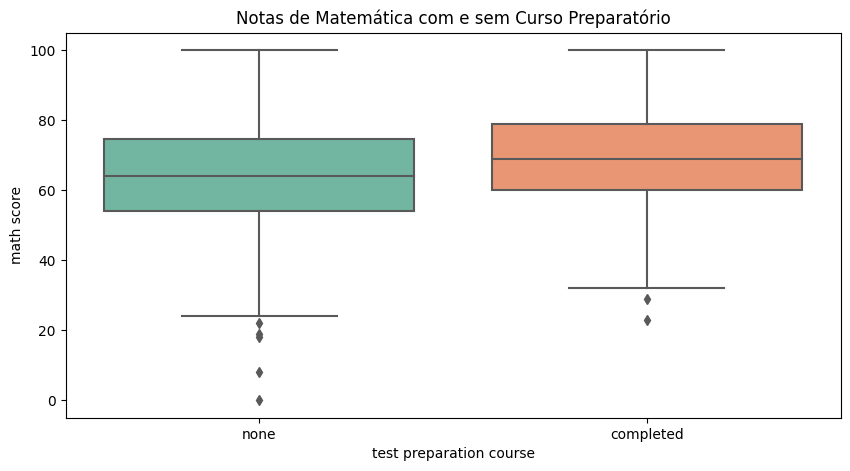

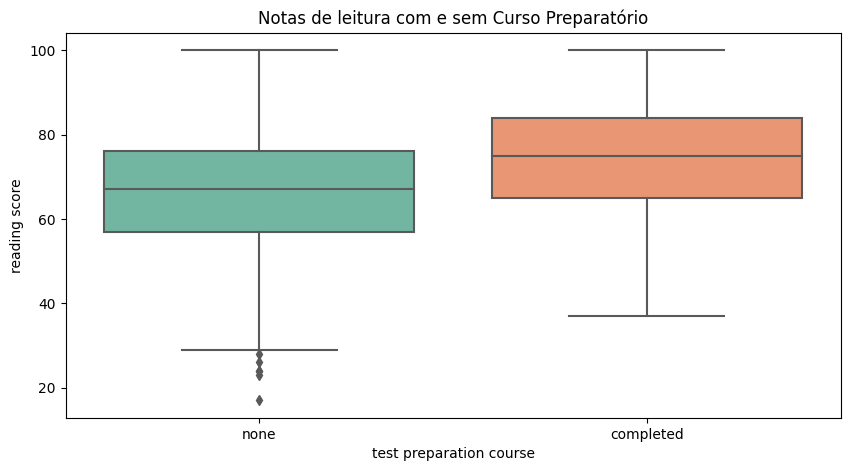

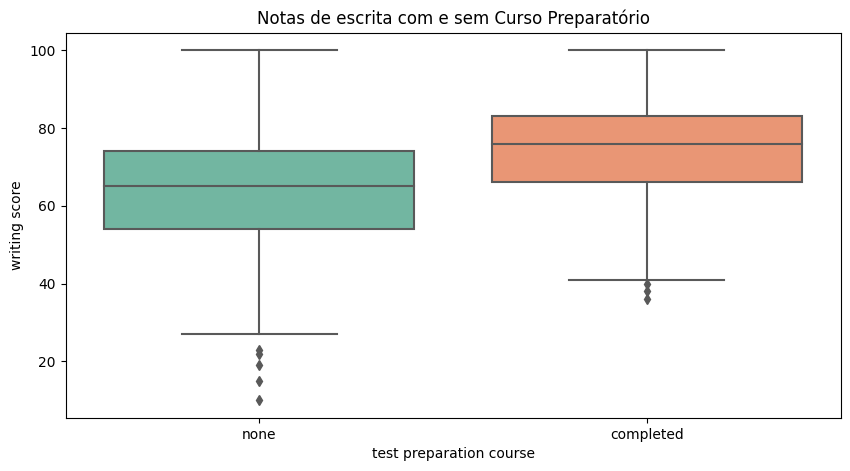

In [ ]:
# Notas entre Alunos com e sem Curso Preparatório.

plt.figure(figsize=(10, 5))
sns.boxplot(x='test preparation course', y='math score', data=st_performance, palette='Set2')
plt.title('Notas de Matemática com e sem Curso Preparatório')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='test preparation course', y='reading score', data=st_performance, palette='Set2')
plt.title('Notas de leitura com e sem Curso Preparatório')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='test preparation course', y='writing score', data=st_performance, palette='Set2')
plt.title('Notas de escrita com e sem Curso Preparatório')
plt.show()

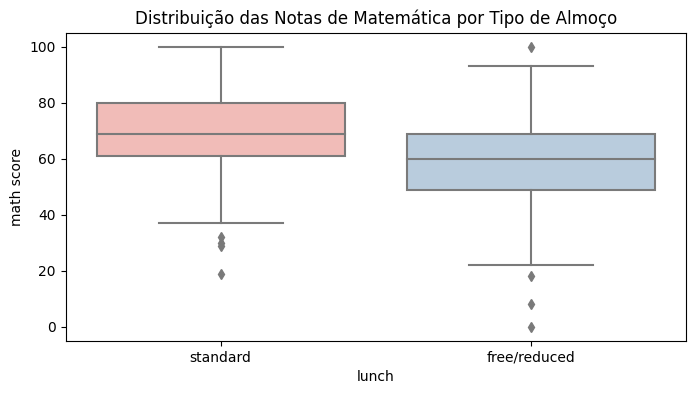

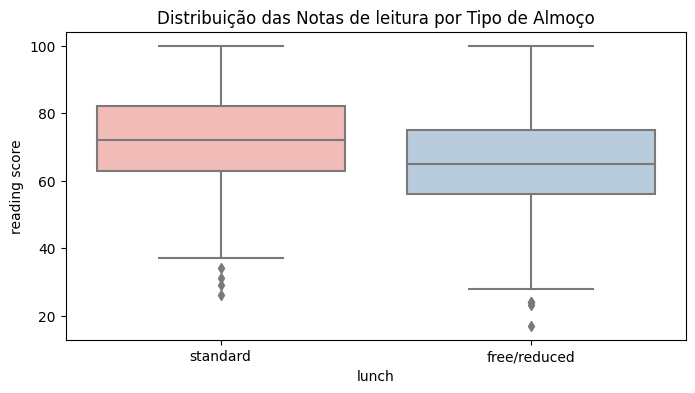

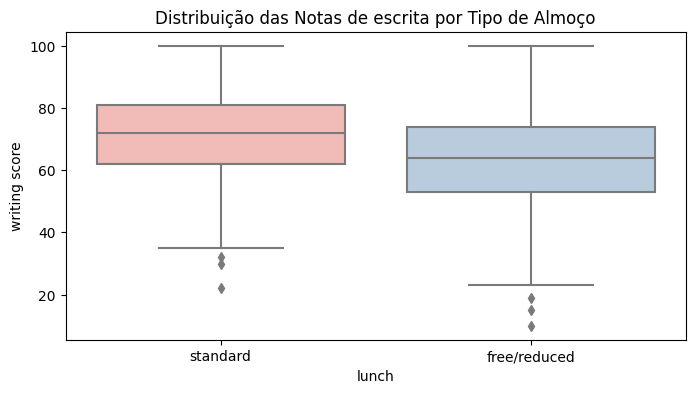

In [ ]:
# Distribuição das Notas por Tipo de Almoço.

plt.figure(figsize=(8, 4))
sns.boxplot(x='lunch', y='math score', data=st_performance, palette='Pastel1')
plt.title('Distribuição das Notas de Matemática por Tipo de Almoço')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='lunch', y='reading score', data=st_performance, palette='Pastel1')
plt.title('Distribuição das Notas de leitura por Tipo de Almoço')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='lunch', y='writing score', data=st_performance, palette='Pastel1')
plt.title('Distribuição das Notas de escrita por Tipo de Almoço')
plt.show()

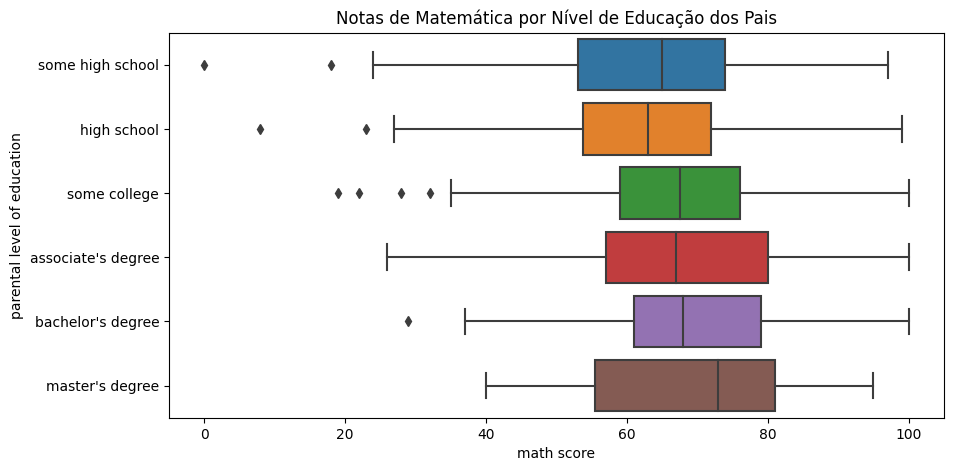

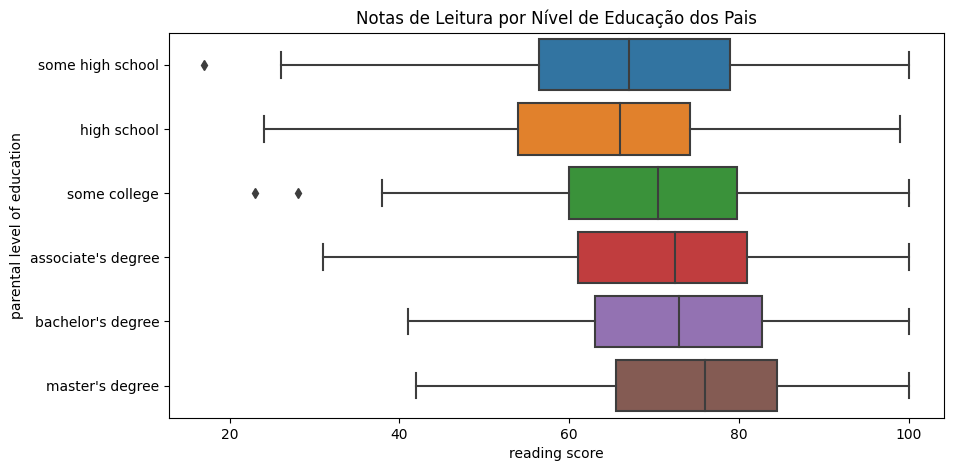

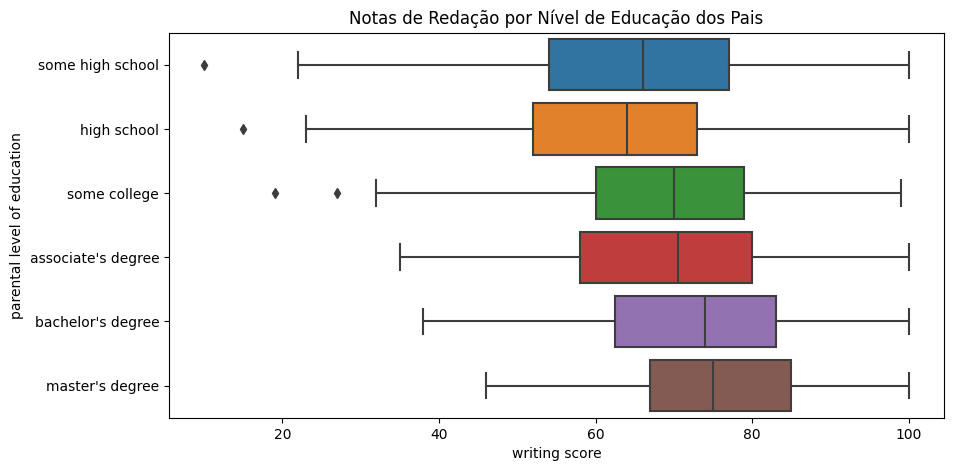

In [ ]:
# Grau de escolaridade dos pais em relação as notas dos filhos

plt.figure(figsize=(10, 5))
sns.boxplot(x='math score', y='parental level of education', data=st_performance, order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Notas de Matemática por Nível de Educação dos Pais')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='reading score', y='parental level of education', data=st_performance, order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Notas de Leitura por Nível de Educação dos Pais')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='writing score', y='parental level of education', data=st_performance, order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Notas de Redação por Nível de Educação dos Pais')
plt.show()


### Grau de escolaridade dos pais em relação as notas dos filhos - **Conclusão:**

Observamos uma certa tendência de quanto maior o nível educacional dos pais, maiores as notas dos seus filhos.



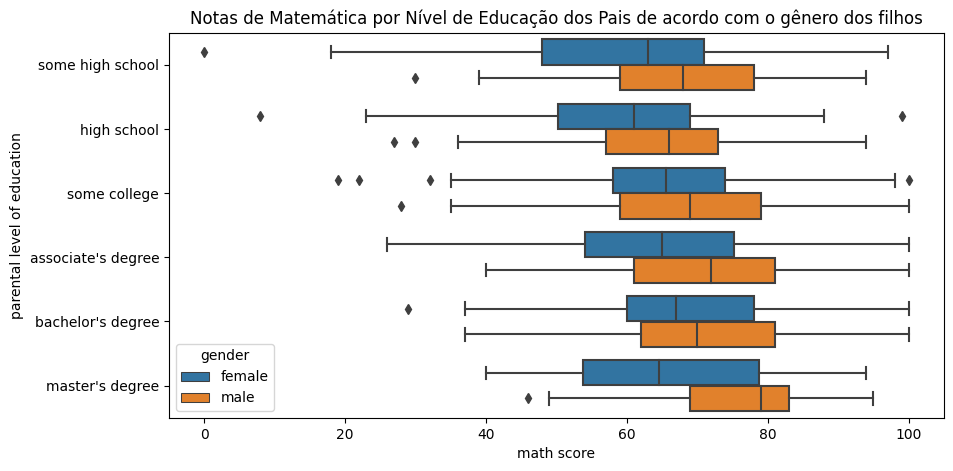

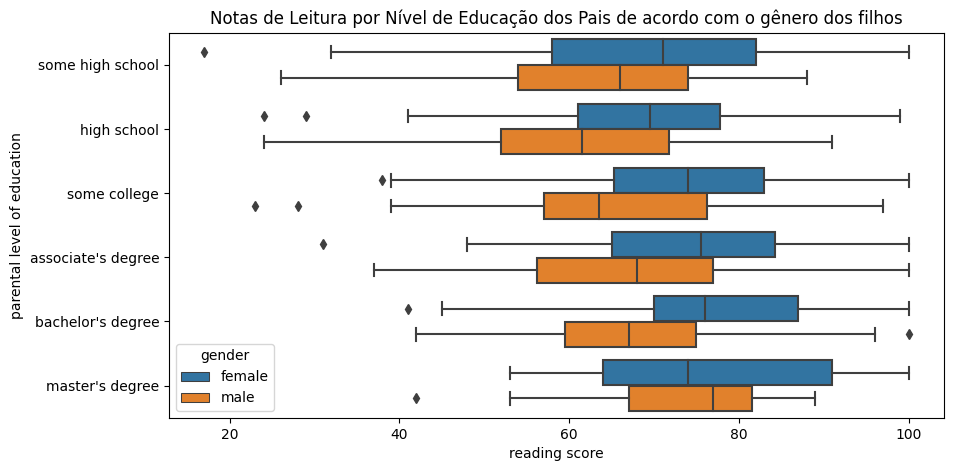

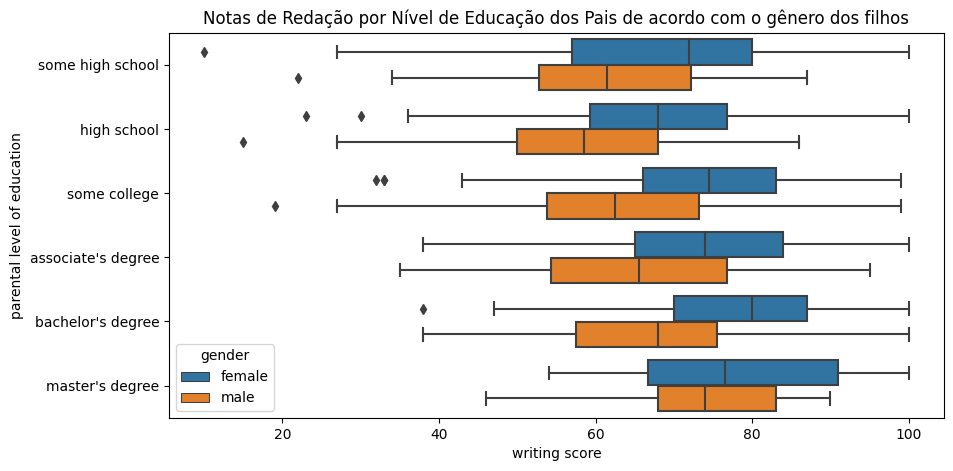

In [ ]:
# Fazendo as mesmas análises de grau de escolaridade dos pais em relação as notas dos filhos por gênero

plt.figure(figsize=(10, 5))
sns.boxplot(x='math score', y='parental level of education', hue='gender',data=st_performance, order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Notas de Matemática por Nível de Educação dos Pais de acordo com o gênero dos filhos')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='reading score', y='parental level of education', hue='gender',data=st_performance, order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Notas de Leitura por Nível de Educação dos Pais de acordo com o gênero dos filhos')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='writing score', y='parental level of education', hue='gender',data=st_performance, order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Notas de Redação por Nível de Educação dos Pais de acordo com o gênero dos filhos')
plt.show()


### Grau de escolaridade dos pais em relação as notas dos filhos por gênero - **Conclusão:**

Quando separamos por gênero observamos que os resultados mudam:
- Observamos uma maior dispersão (variação) nas notas das mulheres em relação aos homens;
- Notas de matemática: Quanto maior o nível de escolaridade dos pais, maiores as notas dos homens, padrão que não é repetido nas mulheres
- Notas de leitura: As mulheres tem uma tendência de ler mais do que os homens independente do nível de educação dos pais, apesar desse comportamento não se repetir em pais que têm mestrado. Os homens filhos de pais com mestrado apresentam maiores notas de leitura, enquanto que as mulheres apresentam maior variação das notas.
- Notas de redação: Assim como leem mais, as mulheres apresentam maior tendência de notas maiores na redação.

